# Weibull
[Wikipedia](https://en.wikipedia.org/wiki/Weibull_distribution)

![Weibull PDF](weibull.png)

### Parameters
- Shape parameter (k): Determines the shape of the failure distribution. A value of k > 1 indicates that the failure rate increases over time (as in our example), while a value of k < 1 indicates that the failure rate decreases over time. A value of k = 1 indicates that the failure rate is constant over time (i.e., the data follows an exponential distribution).

- Scale parameter (λ): Determines the scale of the failure distribution. A larger value of λ corresponds to a longer time to failure.

- Location parameter: Shifts the distribution along the x-axis, but is not particularly useful in practice for predictive maintenance.

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

`f(t) = e^(.2t) + epsilon`

In [3]:
# Create dataset
np.random.seed(123)
time = np.arange(0, 50, 0.5)  # hours (so 1/2 hour increment)
sensor_value = np.exp(0.2 * time) + np.random.normal(0, 1, len(time))
df = pd.DataFrame({'time': time, 'sensor_value': sensor_value})

df.head()

,time,sensor_value
0,0.0,-0.085631
1,0.5,2.102516
2,1.0,1.504381
3,1.5,-0.156436
4,2.0,0.913224


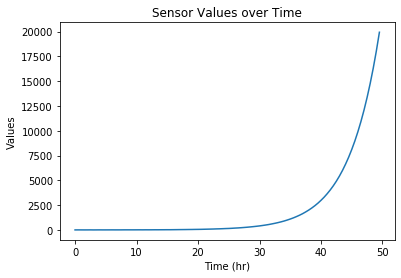

In [9]:
plt.plot(df['time'], df['sensor_value'])
plt.title('Sensor Values over Time')
plt.xlabel('Time (hr)')
plt.ylabel('Values')
plt.show()

In [4]:
# Fit Weibull
shape, loc, scale = stats.weibull_min.fit(df['sensor_value'])
print(f"Shape (k): {shape:.2f}, Location: {loc:.2f}, Scale (λ): {scale:.2f}")

Shape (k): 0.38, Location: -0.60, Scale (λ): 1585.86


### Visualize Fitted Weibull

In [16]:
x = np.linspace(0, 50, 10)

pdf = stats.weibull_min.pdf(x, shape, loc, scale)

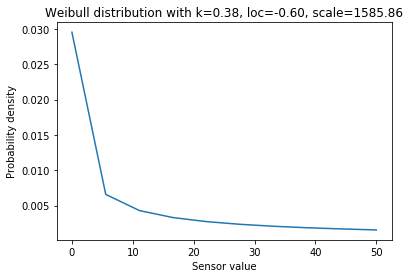

In [17]:
plt.plot(x, pdf)
plt.xlabel('Sensor value')
plt.ylabel('Probability density')
plt.title(f'Weibull distribution with k={shape:.2f}, loc={loc:.2f}, scale={scale:.2f}')
plt.show()

Predict time to failure when the sensor value exceeds the threshold

In [21]:
thresh = 5000
t = -np.log(1 - 0.95) * (thresh / scale)**shape
print(f"Time to failure: {t:.2f} hours")

Time to failure: 4.65 hours
